Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.

answer:

Boosting in Machine Learning is an ensemble learning technique that combines multiple weak learners (models that perform slightly better than random guessing) sequentially to create a strong learner with high predictive accuracy. The key idea is that each new model in the sequence focuses on the errors made by the previous models, giving more weight to misclassified or difficult-to-predict instances. By iteratively correcting mistakes, the ensemble reduces bias and improves overall performance. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost. In essence, boosting improves weak learners by making them complement each other’s weaknesses, resulting in a robust, highly accurate predictive model.


Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
answer :

AdaBoost and Gradient Boosting are both boosting algorithms, but they differ in how they train models. In AdaBoost, models are trained sequentially, and after each model, the algorithm increases the weights of misclassified samples so that the next model focuses more on these difficult instances. The final prediction is a weighted vote of all models.

In Gradient Boosting, models are also trained sequentially, but each new model is trained to predict the residual errors (gradients) of the previous model using a loss function. The predictions are then combined to minimize the overall loss. In short, AdaBoost adjusts sample weights, while Gradient Boosting fits new models to the residuals of previous models.

Question 3: How does regularization help in XGBoost?

answer :

Regularization in XGBoost helps prevent overfitting and improves model generalization. XGBoost includes both L1 (Lasso) and L2 (Ridge) regularization terms in its objective function:

L1 regularization (alpha): Adds a penalty proportional to the absolute values of leaf weights. It encourages sparsity, effectively removing less important features.

L2 regularization (lambda): Adds a penalty proportional to the squared values of leaf weights. It stabilizes the model by preventing extremely large weights.

By penalizing complex trees and large leaf values, regularization ensures that XGBoost does not overfit the training data and produces a more robust, generalizable model.

Question 4: Why is CatBoost considered efficient for handling categorical data?

answer:

CatBoost is considered efficient for handling categorical data because it can process categorical features directly without requiring extensive preprocessing, such as one-hot encoding.

It uses a technique called ordered target encoding, which replaces categories with statistics derived from the target variable in a way that prevents target leakage.

Additionally, CatBoost implements ordered boosting, which ensures that each model only uses information from preceding data points during training. This allows CatBoost to handle categorical variables efficiently, reduce overfitting, and maintain high predictive accuracy, especially on datasets with many categorical features.

Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Answer:

Boosting techniques are preferred over bagging methods in real-world applications where high predictive accuracy is crucial and the data may have complex patterns or imbalanced classes. Examples include:

Credit scoring and fraud detection – correctly identifying rare fraudulent transactions or high-risk customers.

Customer churn prediction – predicting which customers are likely to leave a service.

Medical diagnosis – detecting diseases (like cancer) where false negatives are costly.

Recommendation systems – predicting user preferences accurately.

Sales and marketing predictions – forecasting product demand or campaign responses.

Boosting works well in these scenarios because it focuses on hard-to-predict cases, sequentially correcting errors, which usually leads to better performance than bagging.

In [1]:
'''Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy

'''

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
adaboost.fit(X_train, y_train)

# Predict on test set
y_pred = adaboost.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of AdaBoost Classifier:", accuracy)



Accuracy of AdaBoost Classifier: 0.9473684210526315


In [2]:
'''
Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score


'''
# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load California Housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

# Predict on test set
y_pred = gbr.predict(X_test)

# Evaluate using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score of Gradient Boosting Regressor:", r2)


R-squared score of Gradient Boosting Regressor: 0.7803012822391022


In [3]:
'''
Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy
'''

# Import libraries
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define hyperparameter grid for learning_rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [18:14:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.2}
Accuracy on Test Set: 0.9707602339181286


In [5]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


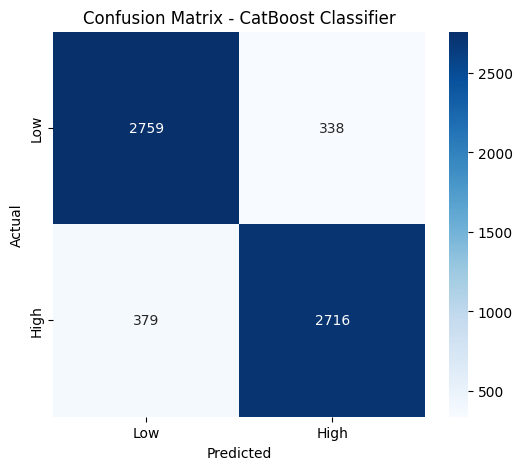

In [6]:
'''
Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn
'''

# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Convert to binary classification: 1 if median_house_value > median, else 0
median_value = np.median(y)
y_binary = (y > median_value).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

# Train CatBoost Classifier
cat_clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    verbose=0,
    random_state=42
)
cat_clf.fit(X_train, y_train)

# Predict on test set
y_pred = cat_clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


Best Parameters: {'depth': 5, 'iterations': 200, 'learning_rate': 0.1}
Accuracy: 0.954
Precision: 0.937037037037037
Recall: 0.8295081967213115
F1-score: 0.88
ROC-AUC: 0.9740750394402908


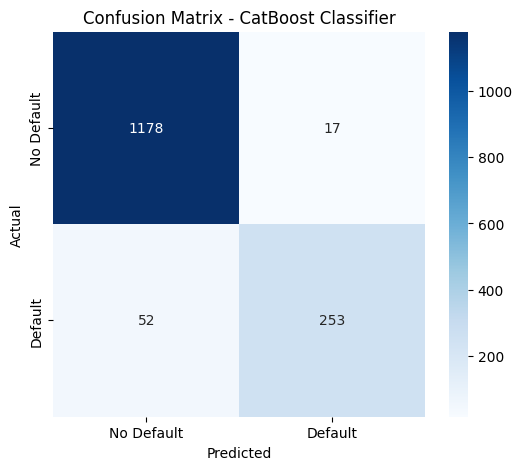

In [8]:
'''
Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model


ANSWER:

Step 1: Data Preprocessing & Handling Missing/Categorical Values

Handle Missing Values:

For numeric features → fill with mean/median or use iterative imputation.

For categorical features → fill with mode or a special category like "Unknown".

Encode Categorical Features:

For XGBoost/AdaBoost → use one-hot encoding or ordinal encoding.

For CatBoost → pass categorical features directly (CatBoost handles them natively).

Feature Scaling (if needed):

Boosting methods like XGBoost/CatBoost don’t require strict scaling, but scaling can help with interpretability.

Handle Imbalanced Classes:

Use class weights, SMOTE, or undersampling to balance minority (default) and majority classes.


Step 2: Choice of Boosting Algorithm

AdaBoost: Simple, works with weak learners, less efficient for large datasets.

XGBoost: Highly efficient, handles missing values internally, good for large datasets.

CatBoost: Best for datasets with categorical features, prevents target leakage with ordered target encoding.

Recommendation: Use CatBoost if the dataset has many categorical variables; otherwise, XGBoost is a strong choice.



Step 3: Hyperparameter Tuning Strategy

Key hyperparameters to tune:

n_estimators (number of trees),

learning_rate (controls contribution of each tree),

max_depth (tree depth),

subsample (fraction of data per tree),

colsample_bytree (fraction of features per tree).

Tuning Methods:

Start with GridSearchCV or RandomizedSearchCV with 5-fold cross-validation.

Optionally, use Bayesian Optimization or Optuna for large search spaces.



Step 4: Evaluation Metrics

Accuracy → general performance but not enough for imbalanced data.

Precision & Recall →

Recall is critical to catch high-risk customers (avoid false negatives).

Precision prevents unnecessarily flagging low-risk customers.

F1-Score → balances Precision and Recall.

ROC-AUC / PR-AUC → evaluates ranking ability and performance on imbalanced classes.

Confusion Matrix → to visualize true positives, false positives, etc.


Step 5: Business Benefits

Reduce financial risk: Predicting defaults accurately avoids lending to high-risk customers.

Optimize lending decisions: Allocate loans efficiently, balancing risk and profit.

Improve customer experience: Avoid false positives that might reject good customers.

Feature insights: Feature importance from boosting models highlights key risk factors for decision-making.

Regulatory compliance: Transparent models (like XGBoost/CatBoost with feature importance) help justify decisions.

-----
Here’s a complete Python pipeline for predicting loan default using boosting (we’ll use CatBoost, since it handles categorical data efficiently),
including preprocessing, handling missing values, training, hyperparameter tuning, and evaluation:
-----

'''


# Install catboost if not already installed
# !pip install catboost

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from catboost import CatBoostClassifier, Pool

# -----------------------------
# Step 1: Load dataset
# -----------------------------
# For demonstration, let's create a synthetic dataset mimicking loan default
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=5000,
    n_features=10,
    n_informative=7,
    n_redundant=2,
    n_classes=2,
    weights=[0.8, 0.2],  # imbalanced classes
    random_state=42
)

# Convert to DataFrame for easier handling
feature_names = [f"feature_{i}" for i in range(X.shape[1])]
data = pd.DataFrame(X, columns=feature_names)
data['target'] = y

# Introduce some categorical columns for demonstration
data['cat_feature_1'] = np.random.choice(['A','B','C'], size=data.shape[0])
data['cat_feature_2'] = np.random.choice(['X','Y'], size=data.shape[0])

# Introduce some missing values
for col in ['feature_1','cat_feature_1']:
    data.loc[data.sample(frac=0.1, random_state=42).index, col] = np.nan

# -----------------------------
# Step 2: Handle missing values
# -----------------------------
# Numeric columns → fill with median
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Categorical columns → fill with 'Unknown'
categorical_cols = ['cat_feature_1','cat_feature_2']
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# -----------------------------
# Step 3: Train-test split
# -----------------------------
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Identify categorical feature indices for CatBoost
cat_features_indices = [X.columns.get_loc(col) for col in categorical_cols]

# -----------------------------
# Step 4: Define CatBoost Classifier
# -----------------------------
cat_clf = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=4,
    eval_metric='AUC',
    random_state=42,
    verbose=0
)

# -----------------------------
# Step 5: Hyperparameter tuning (optional)
# -----------------------------
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [3, 4, 5],
    'iterations': [100, 200]
}

grid_search = GridSearchCV(
    estimator=cat_clf,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train, cat_features=cat_features_indices)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# -----------------------------
# Step 6: Evaluate performance
# -----------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Default','Default'], yticklabels=['No Default','Default'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()
